<a href="https://colab.research.google.com/github/K-Saritha/ML-LAB/blob/main/knn_fp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import pickle
import os
from sklearn.impute import KNNImputer


In [ ]:
data = pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

In [ ]:
#understanding the data
#How big the data is?
data.shape

(22750, 9)

In [ ]:
#How does the data look like?
data.sample(5)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
16132,fffe3700370039003000,2008-04-07,Male,Service,No,2,3.0,4.5,NaN
21105,fffe32003700350030003000,2008-09-27,Female,Product,Yes,2,5.0,4.5,0.37
19452,fffe31003800390034003100,2008-05-25,Female,Service,Yes,1,3.0,NaN,0.28
3331,fffe32003500310033003500,2008-01-13,Female,Service,Yes,2,4.0,5.5,0.33
10004,fffe32003700350036003400,2008-10-03,Female,Service,No,0,2.0,3.1,0.18


In [ ]:
#What is the datatype of columns?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
#Are there any missing values?
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
#How does the data look mathematically?
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
#Are there any duplicated values?
data.duplicated().sum()

0

In [ ]:
#Correlation among the columns?
data.corr(numeric_only=True)

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.878459,0.690983,0.737556
Resource Allocation,0.878459,1.000000,0.799662,0.856278
Mental Fatigue Score,0.690983,0.799662,1.000000,0.944546
Burn Rate,0.737556,0.856278,0.944546,1.000000


In [ ]:
# Display unique values for object columns
data_obj = data.select_dtypes(object)
pprint({c: data_obj[c].unique()[:10] for c in data_obj.columns})

{'Company Type': array(['Service', 'Product'], dtype=object),
 'Employee ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe31003300320037003900', 'fffe32003400380032003900',
       'fffe31003900340031003600', 'fffe3300350037003500',
       'fffe33003300340039003100', 'fffe32003600320037003400',
       'fffe32003200300034003700', 'fffe31003600320030003200'],
      dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH Setup Available': array(['No', 'Yes'], dtype=object)}


In [ ]:
# Drop irrelevant columns
data = data.drop('Employee ID', axis=1)

# Print min and max dates
print(f"Min date: {data['Date of Joining'].min()}")
print(f"Max date: {data['Date of Joining'].max()}")

Min date: 2008-01-01 00:00:00
Max date: 2008-12-31 00:00:00


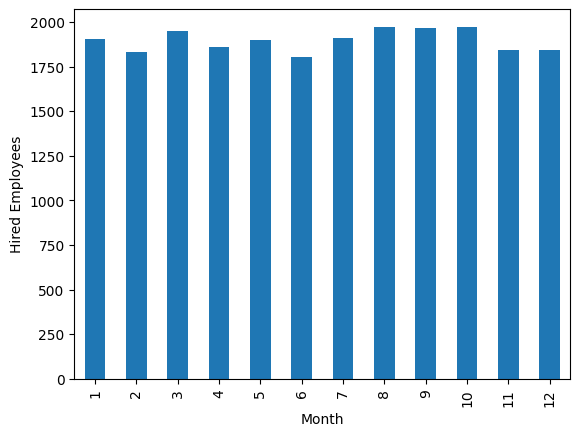

In [ ]:
# Convert Date of Joining to datetime
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])

# Extract month from Date of Joining
data['Joining Month'] = data['Date of Joining'].dt.month

# Plot the number of employees hired each month
data['Joining Month'].value_counts().sort_index().plot(kind='bar', xlabel='Month', ylabel='Hired Employees')

# Assume 'BurnRate' is the target variable
target = 'Burn Rate'

In [ ]:

# Check for missing values
print(data.isnull().sum())

Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
Joining Month              0
dtype: int64


In [ ]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
# Convert Date of Joining to ordinal
data['Date of Joining'] = data['Date of Joining'].apply(lambda x: x.toordinal())

# Apply KNN imputer to fill missing values
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data)

In [ ]:
# Convert the imputed numpy array back to a DataFrame
data = pd.DataFrame(data_imputed, columns=data.columns)

In [ ]:
# Split the data into features and target
X = data.drop(columns=[target])
y = data[target]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = rf.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.003767917236928837
Mean Absolute Error: 0.047794044531658815
R^2 Score: 0.89939108821615
